Import all libraries

In [34]:
from docling.datamodel.base_models import FigureElement, InputFormat, Table
from docling.backend.docling_parse_backend import DoclingParseDocumentBackend
from docling.datamodel.base_models import InputFormat
from docling.document_converter import DocumentConverter, PdfFormatOption
from docling_core.types.doc import ImageRefMode, PictureItem, TableItem
from docling.datamodel.pipeline_options import (
    EasyOcrOptions,
    OcrMacOptions, 
    PdfPipelineOptions,
    RapidOcrOptions,
    TesseractCliOcrOptions,
    TesseractOcrOptions
)

import time
import requests
from pathlib import Path
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import math
import os

## 1. Usage via online document 

Taking Docling Technical Report and export to markdown

In [35]:
start_time = time.time()
source = "https://arxiv.org/pdf/2408.09869"
converter = DocumentConverter()
result = converter.convert(source)

end_time = time.time() - start_time

print(f"Total time take for parsing {end_time:.2f} seconds.")
print(result.document.export_to_markdown())

Total time take for parsing 65.04 seconds.
<!-- image -->

## Docling Technical Report

Version 1.0

Christoph Auer Maksym Lysak Ahmed Nassar Michele Dolfi Nikolaos Livathinos Panos Vagenas Cesar Berrospi Ramis Matteo Omenetti Fabian Lindlbauer Kasper Dinkla Lokesh Mishra Yusik Kim Shubham Gupta Rafael Teixeira de Lima Valery Weber Lucas Morin Ingmar Meijer Viktor Kuropiatnyk Peter W. J. Staar

AI4K Group, IBM Research R¨ uschlikon, Switzerland

## Abstract

This technical report introduces Docling , an easy to use, self-contained, MITlicensed open-source package for PDF document conversion. It is powered by state-of-the-art specialized AI models for layout analysis (DocLayNet) and table structure recognition (TableFormer), and runs efficiently on commodity hardware in a small resource budget. The code interface allows for easy extensibility and addition of new features and models.

## 1 Introduction

Converting PDF documents back into a machine-processable format has been a major chal

## 2. Usage local document 

In [36]:
url = "https://drive.google.com/uc?export=download&id=1NMxBSo4ukjKaATBGCsjICwtW3mdE9S9w"
response = requests.get(url)
with open("sample_doc.pdf", "wb") as file:
    file.write(response.content)

print("File downlaod as sample_doc.pdf")

File downlaod as sample_doc.pdf


Convert document

In [37]:
start_time = time.time()
source = "sample_doc.pdf"
converter = DocumentConverter()
result = converter.convert(source)

end_time = time.time() - start_time

print(f"Total time take for parsing {end_time:.2f} seconds.")
print(result.document.export_to_markdown())

Total time take for parsing 73.59 seconds.
## DocLayNet: A Large Human-Annotated Dataset for Document-Layout Analysis

Birgit Pfitzmann IBM Research Rueschlikon, Switzerland bpf@zurich.ibm.com

Christoph Auer IBM Research Rueschlikon, Switzerland cau@zurich.ibm.com

Michele Dolfi IBM Research Rueschlikon, Switzerland dol@zurich.ibm.com

Ahmed S. Nassar IBM Research Rueschlikon, Switzerland ahn@zurich.ibm.com

Peter Staar IBM Research Rueschlikon, Switzerland taa@zurich.ibm.com

## ABSTRACT

Accurate document layout analysis is a key requirement for highquality PDF document conversion. With the recent availability of public, large ground-truth datasets such as PubLayNet and DocBank, deep-learning models have proven to be very effective at layout detection and segmentation. While these datasets are of adequate size to train such models, they severely lack in layout variability since they are sourced from scientific article repositories such as PubMed and arXiv only. Consequently, the acc

Setting up pipeline to extract the images in "sample_doc.pdf"

In [38]:
IMAGE_RESOLUTION_SCALE = 2.0

input_doc_path = Path("sample_doc.pdf")

pipeline_options = PdfPipelineOptions()
pipeline_options.images_scale = IMAGE_RESOLUTION_SCALE
pipeline_options.generate_page_images = True
pipeline_options.generate_picture_images = True

doc_converter = DocumentConverter(
    format_options={
        InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_options)
    }
)

start_time = time.time()
conv_res = doc_converter.convert(input_doc_path)
end_time = time.time() - start_time
print(f"Total time take for parsing {end_time:.2f} seconds.")

Total time take for parsing 73.75 seconds.


Extract metadata presents in the document

In [39]:
print("Document Name :", conv_res.document.origin.filename)
print("Document Type :", conv_res.document.origin.mimetype)
print("Number of Pages :", len(conv_res.document.pages.keys()))
print("Number of Text Elements :", len(conv_res.document.model_dump()["texts"]))
print("Number of Tables :", len(conv_res.document.model_dump()["tables"]))
print("Number of Images :", len(conv_res.document.model_dump()["pictures"]))

Document Name : sample_doc.pdf
Document Type : application/pdf
Number of Pages : 9
Number of Text Elements : 523
Number of Tables : 5
Number of Images : 6


Iterate through text units and put in an DataFrame

In [40]:
results_body = conv_res.document.model_dump()
# dict_keys(['schema_name', 'version', 'name', 'origin', 'furniture', 'body', 'groups', 'texts', 'pictures', 'tables', 'key_value_items', 'pages'])
dump_list = []
texts = results_body["texts"]

for t in texts:
    ref = t["self_ref"]
    text_content = t["text"]
    page = t["prov"][0]['page_no']
    dump_list.append({
        "text_referece": ref, 
        "page": page, 
        "text_content(first 500 chars)": text_content[:500]
        }
    )

df = pd.DataFrame(dump_list)
display(df)

,text_referece,page,text_content(first 500 chars)
0,#/texts/0,1,arXiv:2206.01062v1 [cs.CV] 2 Jun 2022
1,#/texts/1,1,DocLayNet: A Large Human-Annotated Dataset for...
2,#/texts/2,1,"Birgit Pfitzmann IBM Research Rueschlikon, Swi..."
3,#/texts/3,1,"Christoph Auer IBM Research Rueschlikon, Switz..."
4,#/texts/4,1,"Michele Dolfi IBM Research Rueschlikon, Switze..."
...,...,...,...
518,#/texts/518,9,"[18] Nikolaos Livathinos, Cesar Berrospi, Maks..."
519,#/texts/519,9,"[19] Yiheng Xu, Minghao Li, Lei Cui, Shaohan H..."
520,#/texts/520,9,"[21] Peng Zhang, Can Li, Liang Qiao, Zhanzhan ..."
521,#/texts/521,9,"[22] Peter W J Staar, Michele Dolfi, Christoph..."


Iterate through table units and put in an DataFrame

In [41]:
tables = results_body["tables"]
dump_list = []

for t in tables:
    ref = t["self_ref"]
    page = t["prov"][0]['page_no']

    table_captions = t["captions"]

    if(len(table_captions) and 'cref' in table_captions[0].keys()):
        table_caption = table_captions[0]["cref"]
    else:
        table_caption = "No Caption"
    
    table_data = str(t["data"])[:100]

    dump_list.append({
        "table_reference": ref,
        "page": page, 
        "table_captions": table_caption, 
        "table_data(first 500 chars) ": table_data[:500]
    })

df = pd.DataFrame(dump_list)
display(df)

,table_reference,page,table_captions,table_data(first 500 chars)
0,#/tables/0,4,#/texts/373,"{'table_cells': [{'bbox': {'l': 233.944, 't': ..."
1,#/tables/1,6,No Caption,"{'table_cells': [{'bbox': {'l': 132.365, 't': ..."
2,#/tables/2,7,No Caption,"{'table_cells': [{'bbox': {'l': 86.372, 't': 1..."
3,#/tables/3,7,No Caption,"{'table_cells': [{'bbox': {'l': 358.639, 't': ..."
4,#/tables/4,8,No Caption,"{'table_cells': [{'bbox': {'l': 217.741, 't': ..."


Iterate through image units

In [42]:
images = results_body["pictures"]
dump_list = []

for t in images:
    ref = t["self_ref"]
    page = t["prov"][0]['page_no']

    image_captions = t["captions"]

    if(len(image_captions) and 'cref' in image_captions[0].keys()):
        image_captions = image_captions[0]["cref"]
    else:
        image_captions = "No Caption"
    
    image_data = str(t["image"])[:100]

    dump_list.append({
        "image_reference": ref,
        "page": page, 
        "image_captions": image_captions, 
        "table_data(first 500 chars) ": image_data[:500]
    })

df = pd.DataFrame(dump_list)
display(df)

,image_reference,page,image_captions,table_data(first 500 chars)
0,#/pictures/0,1,#/texts/16,"{'mimetype': 'image/png', 'dpi': 144, 'size': ..."
1,#/pictures/1,3,#/texts/349,"{'mimetype': 'image/png', 'dpi': 144, 'size': ..."
2,#/pictures/2,4,#/texts/374,"{'mimetype': 'image/png', 'dpi': 144, 'size': ..."
3,#/pictures/3,5,No Caption,"{'mimetype': 'image/png', 'dpi': 144, 'size': ..."
4,#/pictures/4,6,#/texts/430,"{'mimetype': 'image/png', 'dpi': 144, 'size': ..."
5,#/pictures/5,9,#/texts/494,"{'mimetype': 'image/png', 'dpi': 144, 'size': ..."


Iterage through the pages of the document

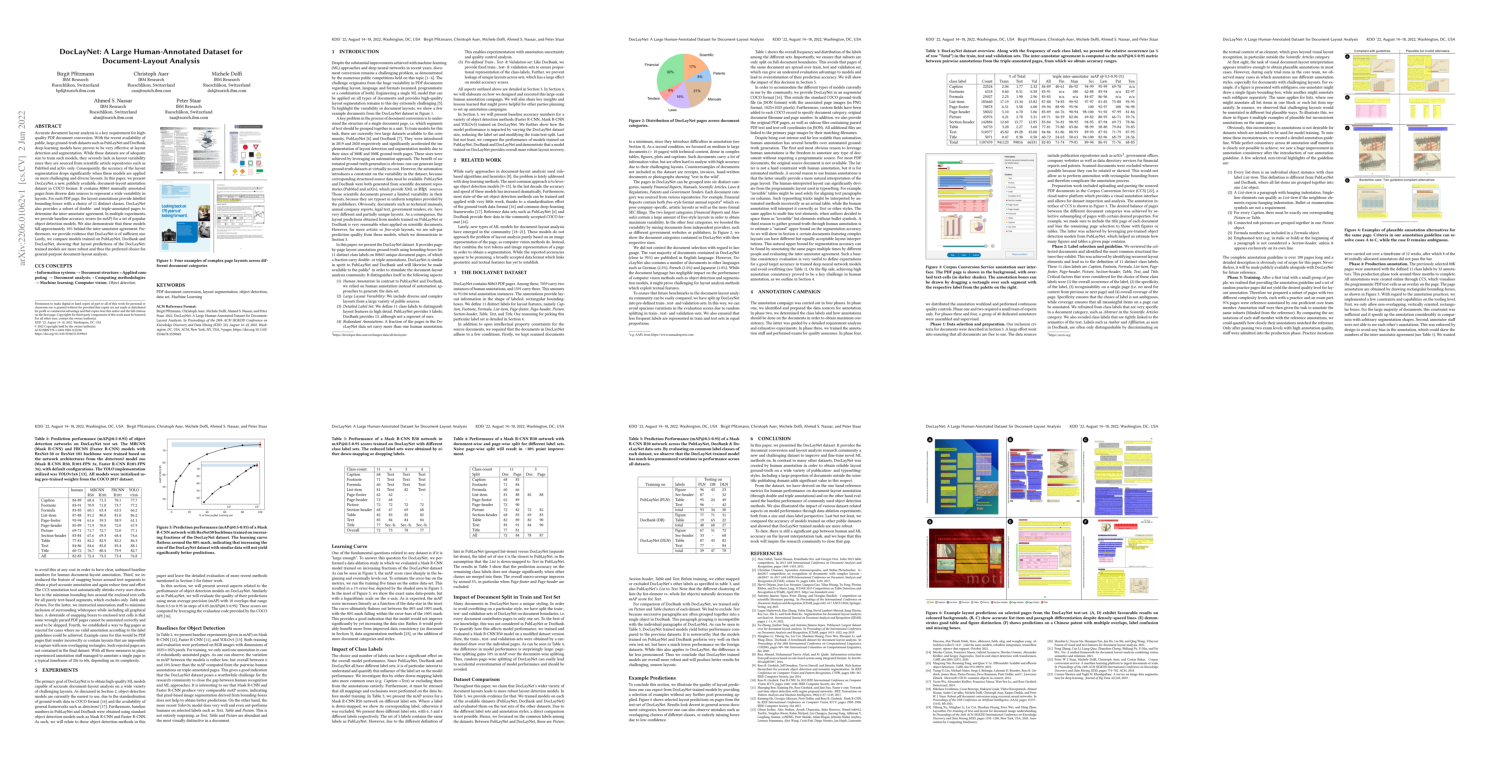

In [43]:
def display_images(images, images_per_row=5, figsize=(15, 8)):

    # handle dictionary or list input
    if isinstance(images, dict):
        images = list(images.values())

    # calculate number of tows needed
    num_rows = math.ceil(len(images) / images_per_row)

    # create subplots
    fig, axes = plt.subplots(num_rows, images_per_row, figsize=figsize)
    axes = axes.flatten() # flatten for easier iteartion

    # plot images
    for ax, image in zip(axes, images):
        ax.imshow(image)
        ax.axis('off')

    # turn off unused axes
    for ax in axes[len(images):]:
        ax.axis('off')

    # adjust layout and display
    plt.tight_layout()
    plt.show()

page_images = {page_no: page.image.pil_image for page_no, page in conv_res.document.pages.items()}
display_images(page_images, images_per_row=5, figsize=(15, 8))

    

Save images to a local directory

In [44]:
dir_path = "./pages"
os.makedirs(dir_path, exist_ok=True)

for page_no, page in conv_res.document.pages.items():
    page_no = page.page_no
    page_image_filename = f"{page_no}.png"
    with open(os.path.join(dir_path, page_image_filename), "wb") as fp:
        page.image.pil_image.save(fp, format="PNG")

Extract all the iamges from the document

In [45]:
dir_path = "./images"
os.makedirs(dir_path, exist_ok=True)
images_list = []
image_number = 1

for element, _level in conv_res.document.iterate_items():
    if isinstance(element, PictureItem):
        element_image_filename = os.path.join(dir_path, str(image_number)) + ".png"
        with open(element_image_filename, "wb") as fp:
            image = element.get_image(conv_res.document)
            image.save(fp, "PNG")
            images_list.append(image)
        image_number+=1

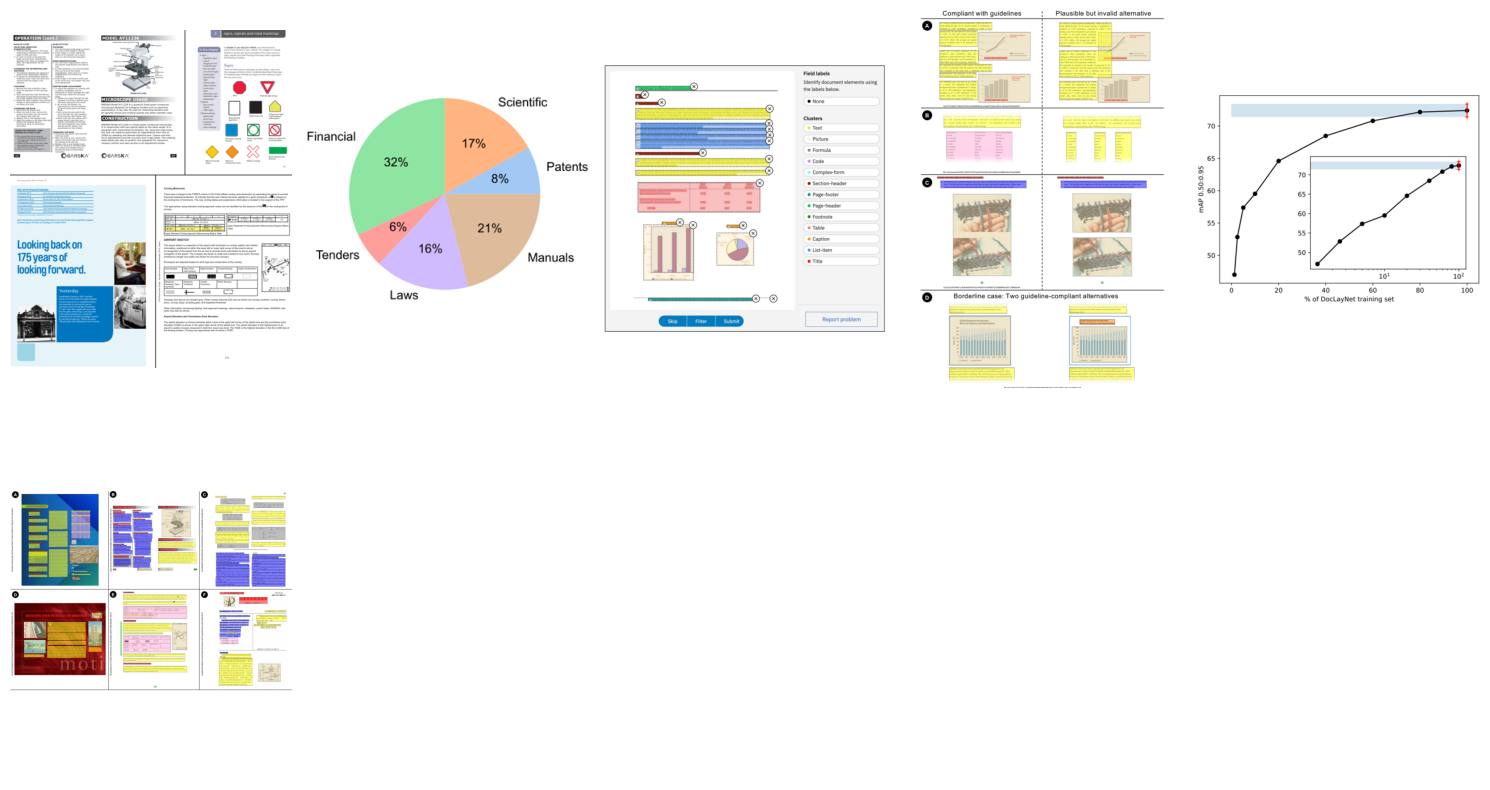

In [46]:
display_images(images_list, images_per_row=5, figsize=(15, 8))

Extract all the tables from the document

In [47]:
dir_path = "./tables"
dir_paths = ["./tables/images", "./tables/CSVs", "./tables/HTMLs"]
[os.makedirs(path, exist_ok=True) for path in dir_paths]
table_list = []
table_number = 1

for element, _level in conv_res.document.iterate_items():
    if isinstance(element, TableItem):

        # saving tables as images
        element_table_filename = os.path.join(dir_path, "images", str(table_number)) + ".png"
        with open(element_table_filename, "wb") as fp:
            table_image = element.get_image(conv_res.document)
            table_image.save(fp, "PNG")
            table_list.append(table_image)
        
        # saving tables as CSV files
        table_df: pd.DataFrame = element.export_to_dataframe()
        element_table_filename = os.path.join(dir_path, "CSVs", str(table_number)) + ".csv"
        table_df.to_csv(element_table_filename)

        # saving tables as HTML files
        table_html = element.export_to_html()
        element_table_filename = os.path.join(dir_path, "HTMLs", str(table_number)) + ".html"
        with open(element_table_filename, "w") as fp:
            fp.write(table_html)

        table_number+=1

Usage of TableItem.export_to_html() without `doc` argument is deprecated.
Usage of TableItem.export_to_html() without `doc` argument is deprecated.
Usage of TableItem.export_to_html() without `doc` argument is deprecated.
Usage of TableItem.export_to_html() without `doc` argument is deprecated.
Usage of TableItem.export_to_html() without `doc` argument is deprecated.


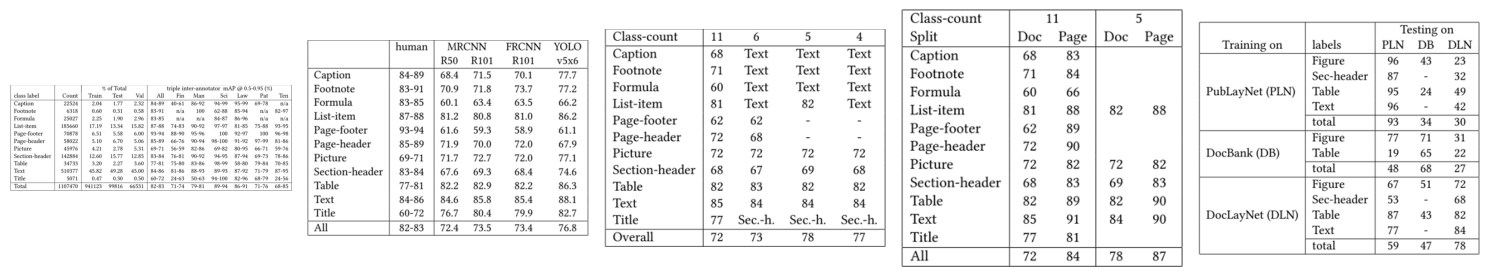

In [48]:
display_images(table_list, images_per_row=5, figsize=(15, 8))

# 3. OCR Example

In [49]:
url = "https://drive.google.com/uc?export=download&id=1PHuluO74AwZLgmZmqtgv-z_OTX-3aQfy"
response = requests.get(url)
with open("scanned_bill.pdf", "wb") as file:
    file.write(response.content)

url = "https://drive.google.com/uc?export=download&id=1TUGp_OsQjh_DgQFK4OgWvkhaywAZUkzy"
response = requests.get(url)
with open("scanned_doc.pdf", "wb") as file:
    file.write(response.content)

print("OCR documents were downloaded as scanned_doc.pdf and scanned_bill.pdf")

OCR documents were downloaded as scanned_doc.pdf and scanned_bill.pdf


Build OCR enabled pipeline

In [50]:
def OCR_parsing(doc_path):
    input_doc = Path(doc_path)
    pipeline_options = PdfPipelineOptions()
    pipeline_options.do_ocr = True
    pipeline_options.do_table_structure = True
    pipeline_options.table_structure_options.do_cell_matching = True
    ocr_options = EasyOcrOptions(force_full_page_ocr=True)
    pipeline_options.ocr_options = ocr_options
    pipeline_options.generate_page_images = True

    start_time = time.time()

    converter = DocumentConverter(
        format_options={
            InputFormat.PDF: PdfFormatOption(
                pipeline_options=pipeline_options
            )
        }
    )

    result = converter.convert(input_doc)
    end_time = time.time() - start_time
    print(f"Total time take for parsing {end_time:.2f} seconds.")
    return result


Total time take for parsing 21.15 seconds.
Docling Extract
REMOTE WORK

## How to Overcome Common Struggles of Working from Home

written by Kelly Benitez

In recent weeks, many people who traditionally work in an office are transitioning to working from home, possibly for the first time. Shifting from an office-based environment to working from home full time even if only temporarily takes some getting used to. And we know; as most of us here at PSPDFKit made that transition for the first time when we joined the company.

To help those of you new to remote work, we plan to share tips to help you be more effective working from home, emphasize the importance of communication, and provide a list of tools we have found to be helpful in our company.

But first, to kick off this series, I will highlight a few of the struggles people face when working from home. This is by no means a comprehensive list, and everyone's experience with remote work is different, but I found that the survey resu

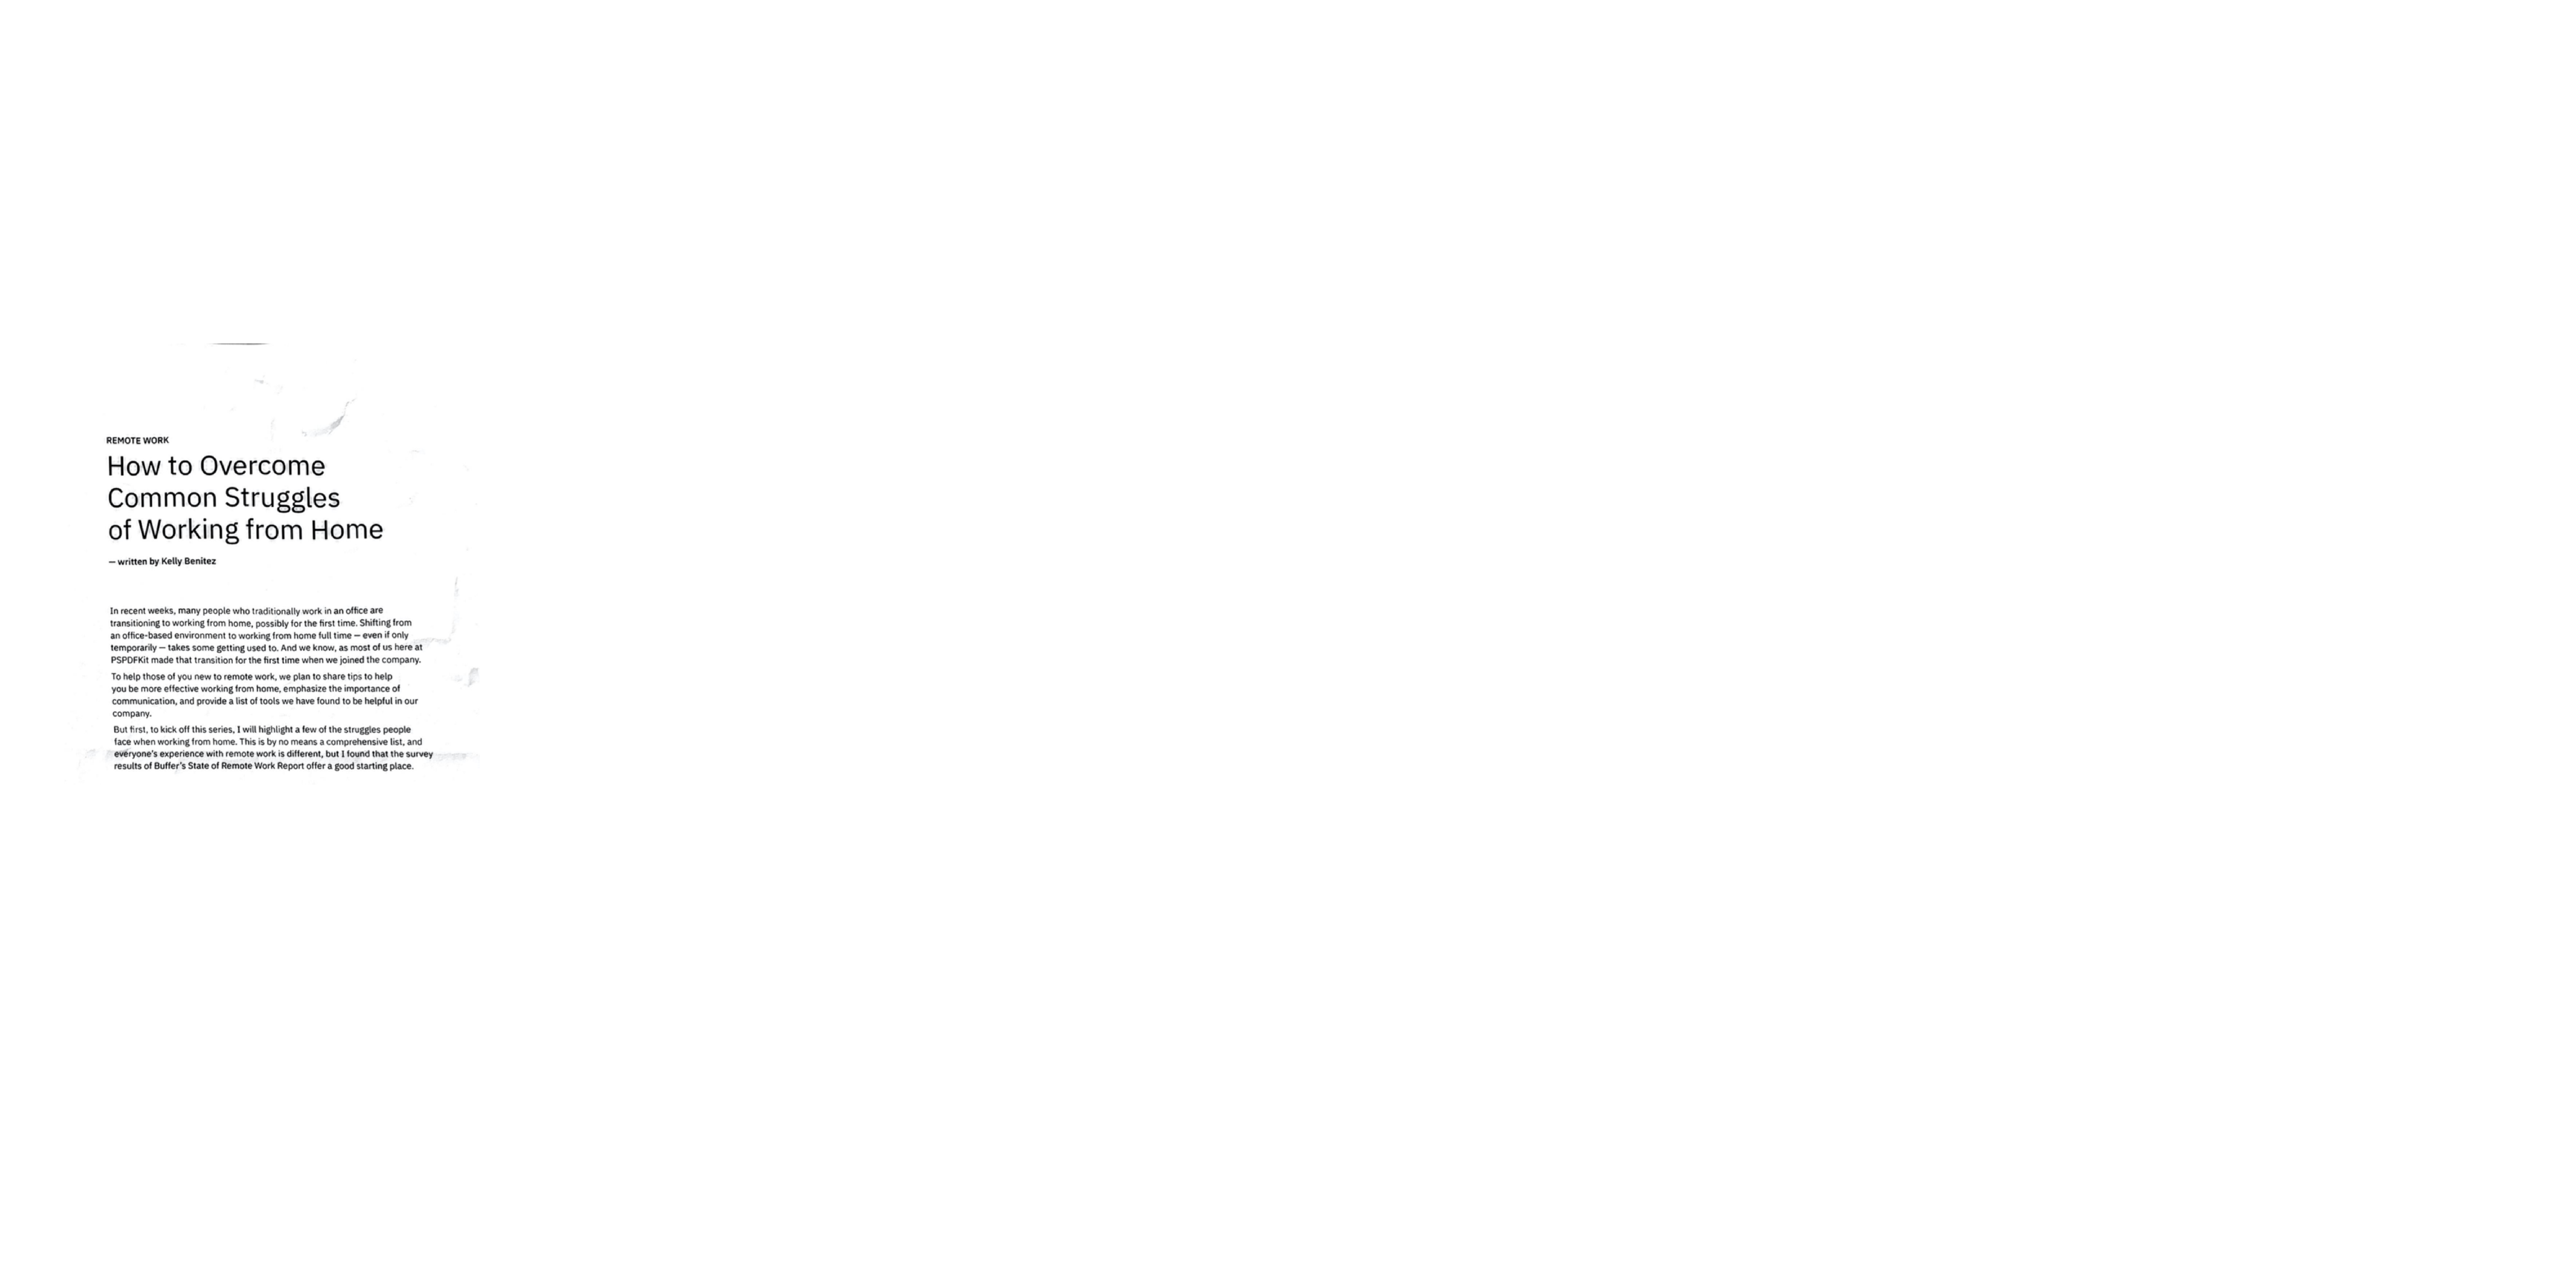

In [51]:
OCR_result = OCR_parsing("./scanned_doc.pdf")

extract = OCR_result.document.export_to_markdown()
print("Docling Extract")
print(extract)

page_images = {page_no: page.image.pil_image for page_no, page in OCR_result.document.pages.items()}
print("Actual Document")
display_images(page_images, images_per_row=5, figsize=(100, 50))

Total time take for parsing 17.71 seconds.
Docling Extract
STARBLICKS Store $7240 00 7th Street Wash ington

## CHK   663682

1417395 Drawer ;

10/27/2014 02:58 PM

1

2

Reg:

1 Chai Latte Tea

3.45

Doppio Espressa

2.25

Doub le

Cash

6.27

Subtota)

Tax Iox

Tota|

Change Due

80 .OO

Check Closed

10/27/2014 02.58 PH
Actual Document


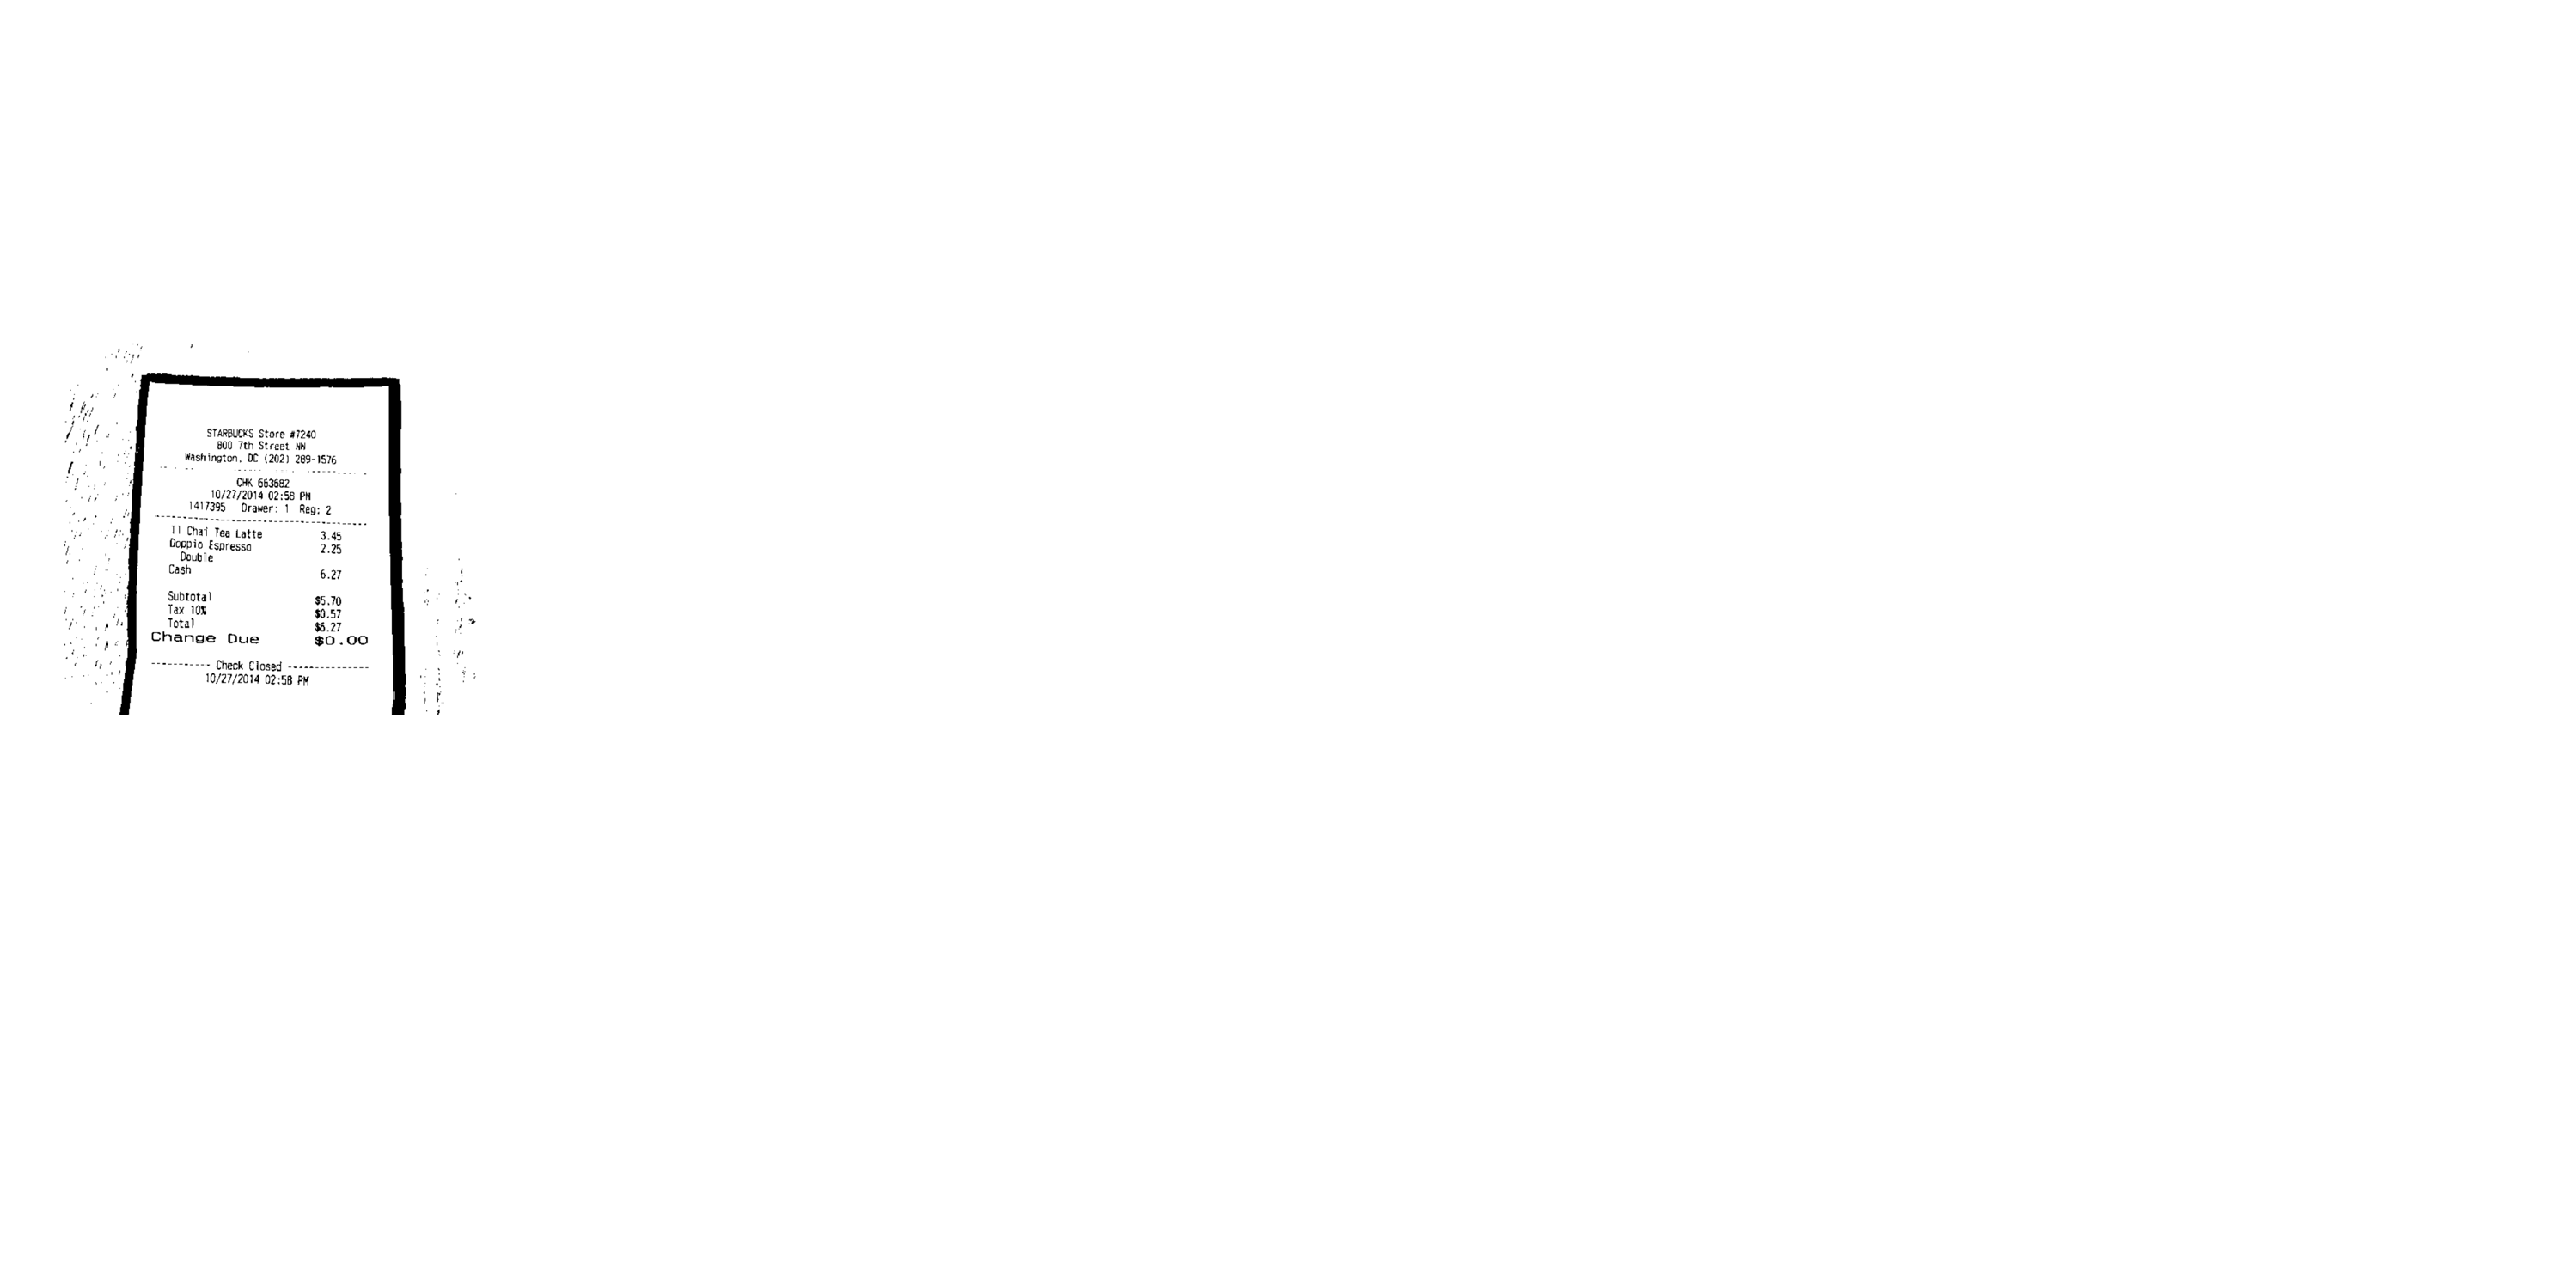

In [52]:
OCR_result = OCR_parsing("./scanned_bill.pdf")

extract = OCR_result.document.export_to_markdown()
print("Docling Extract")
print(extract)

page_images = {page_no: page.image.pil_image for page_no, page in OCR_result.document.pages.items()}
print("Actual Document")
display_images(page_images, images_per_row=5, figsize=(100, 50))